In [1]:
# Importamos las principales bibliotecas para visualizar inicialmente la data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Importamos la data
pd.options.display.float_format ='{:,.2f}'.format # Máximo 2 numeros despues de la coma en las tables
pd.set_option("display.max.columns", None) # Para mostrar todas las columnas cuando sobrepasan los límites.
df = pd.read_csv("bikesharing_modified.csv") # Leyendo el archivo.

In [3]:
# Cabecera de la data
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1/1/2011,spring,0,0,Saturday,0,Clear,0.24,0.29,0.81,0.00,16
1,1/1/2011,spring,1,0,Saturday,0,Clear,0.22,0.27,0.80,0.00,40
2,1/1/2011,spring,2,0,Saturday,0,Clear,0.22,0.27,0.80,0.00,32
3,1/1/2011,spring,3,0,Saturday,0,Clear,0.24,0.29,0.75,0.00,13
4,1/1/2011,spring,4,0,Saturday,0,Clear,0.24,0.29,0.75,0.00,1


In [4]:
# Mostramos la información de la cantidad de elementos y el tipo de objetos en la data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  object 
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  object 
 7   temp        17369 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17366 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.3+ MB


In [5]:
# Revisamos la cantidad de NaN que existen en el archivo
df.isna().sum()

dteday         0
season         0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          10
atemp          0
hum           13
windspeed      0
cnt            0
dtype: int64

In [6]:
df.isin([0]).sum()

dteday            0
season            0
hr              726
holiday       16879
weekday           0
workingday     5514
weathersit        0
temp              0
atemp             2
hum              22
windspeed      2180
cnt               0
dtype: int64

In [7]:
# Codificando los datos de tiempo
df['dteday']      = pd.to_datetime(df['dteday']) 
df['year']        = df.dteday.dt.year 
df['weekday']     = df.dteday.dt.strftime('%a') # Remplazamos la columna de día por su abreviación
df['month']       = df.dteday.dt.strftime('%b') # Creamos la columna mes en una versión corta del nombre
df['month_int']   = df.dteday.dt.month # Creamos una columna para el digito del mes correspondiente
df['weekday_int'] = df.dteday.dt.weekday # Creamos una columna para el digito del día de la semana. 

In [8]:
# Visualizamos los cambios en la data
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5


In [9]:
# Columna de etiquetas
df['outlr_miss']='data' # Creamos la columna de etiquetas con el valor igual a data
df.loc[(df['outlr_miss']=='data') & df['temp'].isna(), 'outlr_miss'] = 'temp_nan' # tag para valores nan en temperatura
df.loc[(df['outlr_miss']=='data') & df['hum'].isna(), 'outlr_miss']  = 'hum_nan' # tag para valores nan en humedad

In [10]:
# Resaltamos las casillas NaN en color verde
df[df.isna().any(axis=1)].style.highlight_null(null_color='lightgreen')

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss
424,2011-01-19 00:00:00,spring,17,0,Wed,1,Clear,0.360000,0.333300,nan,0.328400,197,2011,Jan,1,2,hum_nan
514,2011-01-23 00:00:00,spring,13,0,Sun,0,Clear,0.140000,0.106100,nan,0.388100,87,2011,Jan,1,6,hum_nan
1251,2011-02-25 00:00:00,spring,7,0,Fri,1,Light Snow,0.340000,0.333300,nan,0.134300,35,2011,Feb,2,4,hum_nan
1681,2011-03-15 00:00:00,spring,16,0,Tue,1,Slightly cloudy,nan,0.393900,0.460000,0.328400,114,2011,Mar,3,1,temp_nan
3141,2011-05-15 00:00:00,summer,19,0,Sun,0,Clear,0.560000,0.530300,nan,0.104500,231,2011,May,5,6,hum_nan
5126,2011-08-06 00:00:00,fall,12,0,Sat,0,Clear,0.800000,0.757600,nan,0.223900,382,2011,Aug,8,5,hum_nan
6239,2011-09-22 00:00:00,fall,13,0,Thu,1,Slightly cloudy,0.660000,0.606100,nan,0.194000,193,2011,Sep,9,3,hum_nan
6953,2011-10-22 00:00:00,winter,8,0,Sat,0,Clear,nan,0.409100,0.710000,0.000000,114,2011,Oct,10,5,temp_nan
7566,2011-11-16 00:00:00,winter,21,0,Wed,1,Light Snow,nan,0.439400,0.880000,0.283600,75,2011,Nov,11,2,temp_nan
7835,2011-11-28 00:00:00,winter,3,0,Mon,1,Clear,nan,0.439400,0.880000,0.223900,5,2011,Nov,11,0,temp_nan


In [11]:
# de igual manera que en el ejercicio anterior creamos las etiquetas según lo establecido  anteriormente
df.loc[(df['outlr_miss']=='data') & df['atemp'].isin([0]), 'outlr_miss']    = 'atemp_zero' # Tag para atemp = 0
df.loc[(df['outlr_miss']=='data') & df['hum'].isin([0]), 'outlr_miss']      = 'hum_zero'  # Tag para hum = 0
df.loc[(df['outlr_miss']=='data') & df['windspeed'].isin([0]), 'outlr_miss'] = 'windspeed_zero' # Tag para windspeed = 0

In [12]:
# Verificamos la cabecera de nuestra matriz
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5,windspeed_zero
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5,windspeed_zero
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5,windspeed_zero
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5,windspeed_zero
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5,windspeed_zero


In [13]:
# importamos la biblioteca seaborn para graficar la matriz
import seaborn as sns

# importamos la biblioteca warnings para manejar algunos errores en las gráficas que se pueden presentar
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=UserWarning)

# configuramos el modo de visualización para mostrar en seaborn
sns.set(context='talk',style='ticks',font_scale=0.98)

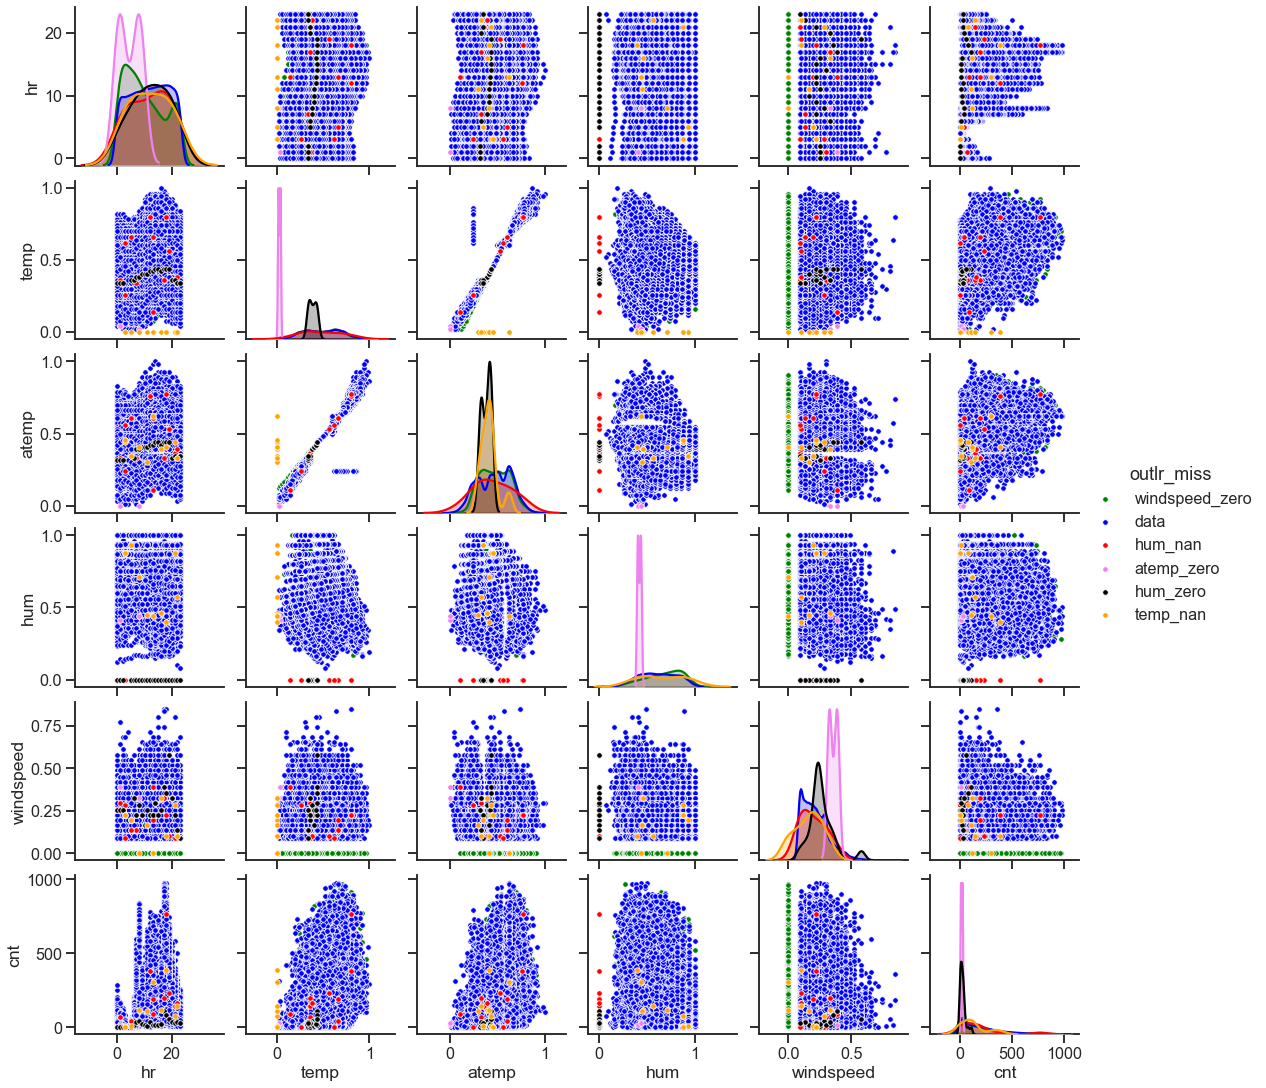

In [14]:
# Creamos la lista de columnas que queremos analizar, básicamente son las originales de la matriz con datos numéricos
features = ['hr','temp','atemp','hum','windspeed','season','weekday','weathersit','cnt','outlr_miss']

# Creamos una paleta de colores para nuestra columna de etiquetas con el fin de visualizarlas mejor. 
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet'}
# Creamos el grafico pairplot
sns.pairplot(df[features].fillna(0), hue="outlr_miss", palette=colorPalette, plot_kws = {'s': 30})
# mostramos el grafico
plt.show()
plt.close('all')


In [15]:
# Buscamos la matriz cuya resta entre temp y atemp sea mayor a 0.3
pd.set_option("display.max.rows", None)
df[(df.temp-df.atemp)>0.3]

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss
14131,2012-08-17,fall,0,0,Fri,1,Clear,0.68,0.24,0.57,0.16,88,2012,Aug,8,4,data
14132,2012-08-17,fall,1,0,Fri,1,Clear,0.66,0.24,0.65,0.10,54,2012,Aug,8,4,data
14133,2012-08-17,fall,2,0,Fri,1,Clear,0.66,0.24,0.61,0.13,19,2012,Aug,8,4,data
14134,2012-08-17,fall,3,0,Fri,1,Clear,0.64,0.24,0.65,0.10,6,2012,Aug,8,4,data
14135,2012-08-17,fall,4,0,Fri,1,Clear,0.64,0.24,0.73,0.16,9,2012,Aug,8,4,data
14136,2012-08-17,fall,5,0,Fri,1,Clear,0.64,0.24,0.73,0.10,36,2012,Aug,8,4,data
14137,2012-08-17,fall,6,0,Fri,1,Clear,0.62,0.24,0.78,0.13,157,2012,Aug,8,4,data
14138,2012-08-17,fall,7,0,Fri,1,Clear,0.64,0.24,0.73,0.10,379,2012,Aug,8,4,data
14139,2012-08-17,fall,8,0,Fri,1,Clear,0.68,0.24,0.65,0.13,668,2012,Aug,8,4,data
14140,2012-08-17,fall,9,0,Fri,1,Clear,0.70,0.24,0.58,0.10,378,2012,Aug,8,4,data


In [16]:
# Extraemos los datos del día mencionado
ts = pd.to_datetime('08/17/2012')

# Marcamos estos datos como outliners
df.loc[(df['outlr_miss']=='data') & df['dteday'].isin([ts]), 'outlr_miss'] = 'atemp_outlr'

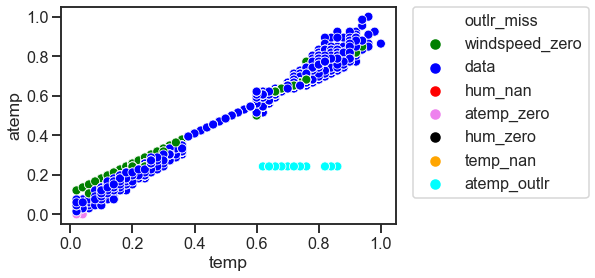

In [17]:
# Verificamos que la etiqueta halla quedado asignada correctamente. 
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet', 'atemp_outlr':'cyan'}
sns.scatterplot(x="temp", y="atemp", data=df, hue="outlr_miss", palette=colorPalette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
# importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [19]:
# creamos una copia del dataset
df_copy = df.copy(deep=True)

# creamos un filtro para utilizar los datos que no tienen problemas en temp y atemp
ftr = ['windspeed_zero', 'data', 'hum_nan','hum_zero']

# Extraemos los datos que no tiene problemas en temp y atemp
df1 = df_copy[df_copy.outlr_miss.isin(ftr)]

# de la matriz resultante  extraemos los datos de temp y atemp descartanto los posibles NaN que puedan haber
df1 = df1[['temp','atemp']].dropna()

# Igualamos X a los valores de temperatura, y a los valores de temperatura aparente.
X   = df1['temp'].values.reshape(-1,1)
y   = df1['atemp'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)

# filtramos los valores de la matriz que son iguales a "atemp_outlr" y a los correspondientes valores de atemp le aplicamos 
# la fórmula para predecir su valor.

df_copy.loc[df_copy['outlr_miss'].isin(['atemp_outlr']), 'atemp'] = df_copy['temp']*regressor.coef_[0][0] + regressor.intercept_[0] 
df_copy.loc[df_copy['outlr_miss'].isin(['atemp_zero']), 'temp']   = df_copy['temp']*regressor.coef_[0][0] + regressor.intercept_[0] 
df_copy.loc[df_copy['outlr_miss'].isin(['temp_nan']), 'temp'] = (df_copy['atemp'] - regressor.intercept_[0]) / regressor.coef_[0][0]


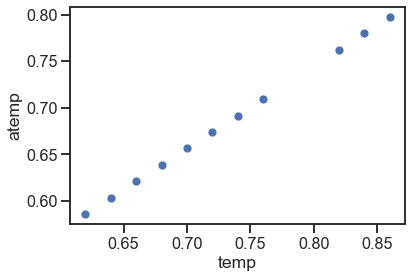

In [20]:
# verificamos que los valores de temperatura hayan sido corregidos
sns.scatterplot(x="temp", y="atemp", data = df_copy[df_copy["dteday"].isin([ts])])

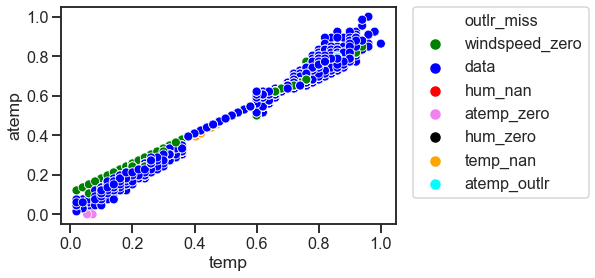

In [21]:
# verificamos el cambio en los datos que fueron corregidos
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet', 'atemp_outlr':'cyan'}
sns.scatterplot(x="temp", y="atemp", data=df_copy, hue="outlr_miss", palette=colorPalette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

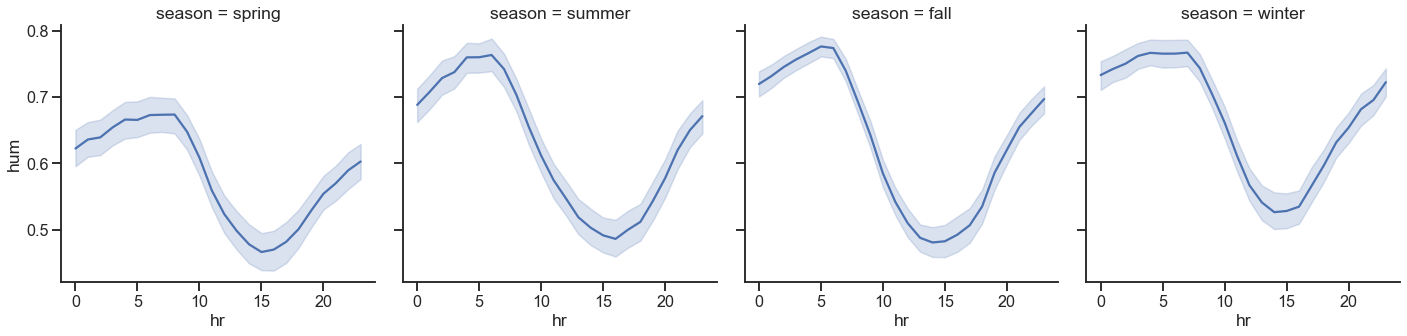

In [22]:
# Realizamos el gráfico de la humedad a lo largo del día separándolo inicialmente por estación
sns.relplot(x="hr", y="hum", data=df_copy, kind="line", col="season")

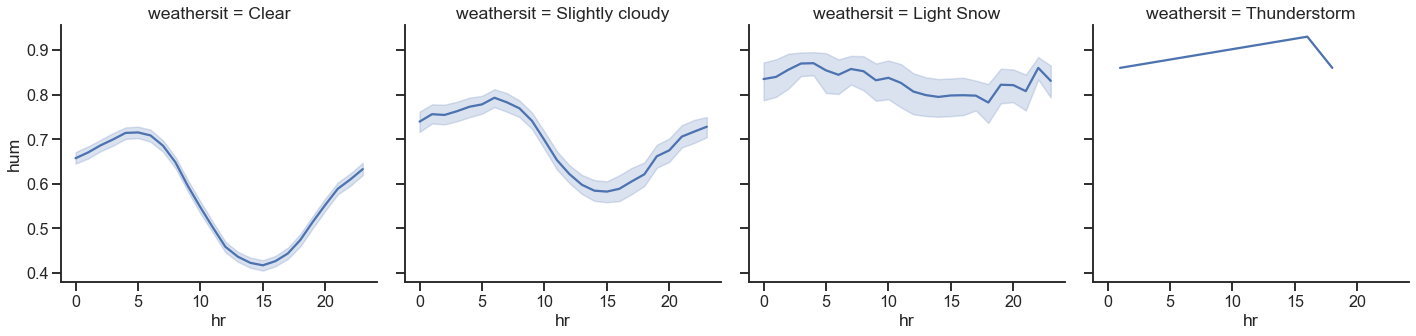

In [23]:
# Realizamos el gráfico de la humedad a lo largo del día separándolo por apreciación del clima.
sns.relplot(x="hr", y="hum", data=df_copy, kind="line", col="weathersit")

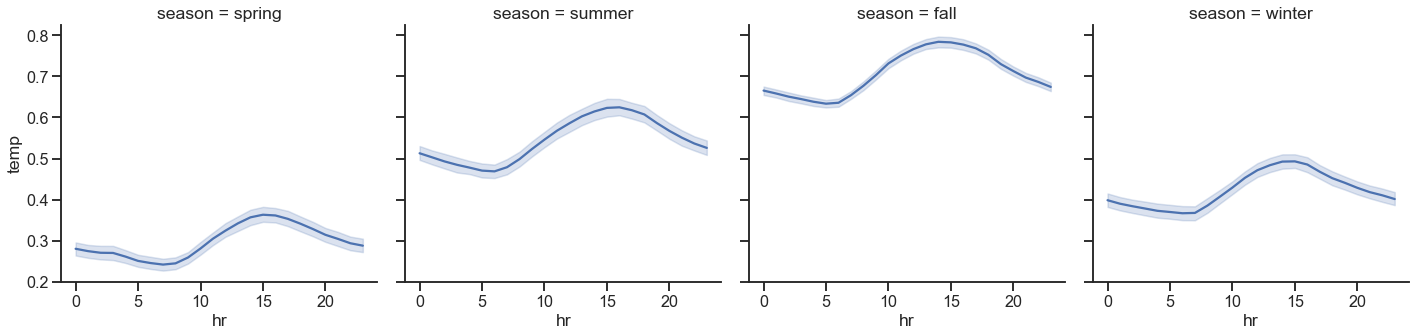

In [24]:
# Realizamos el grafico de temperatura a lo largo del día separándolo por estación. 
sns.relplot(x="hr", y="temp", data=df_copy, kind="line", col="season")

In [25]:
!pip install category_encoders

In [26]:
# Procedemos a categorizar el parámetro estaciones (season) importamos la biblioteca de categorización
import category_encoders as ce 

# Ordenamos la categorización por estación 'season'
df_copy['season_int'] = df_copy['season']

# Creamos el mapa de categorización donde col = columna es el objetivo, Mapping = Texto, es el texto categorizado en 
# el orden requerido

season_mapping = [{"col":"season_int", "mapping": {'spring':1, 'summer':2, 'fall':3, 'winter':4}}] 

# Creamos el encoder con las características para el manejo de los datos ausentes y los que no reconozca
encoder = ce.OrdinalEncoder(cols=['season_int'],mapping = season_mapping, return_df = True, handle_unknown='return_nan', 
                            handle_missing='return_nan')  
# transformamos la df con el encoder
df_copy = encoder.fit_transform(df_copy)

In [27]:
df_copy.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss,season_int
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5,windspeed_zero,1.00
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5,windspeed_zero,1.00
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5,windspeed_zero,1.00
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5,windspeed_zero,1.00
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5,windspeed_zero,1.00


In [28]:
# Realizamos la matriz dummy para la columna season y se concatena con la matriz actual. 
season_dummy = pd.get_dummies(df_copy.season)
df_copy = pd.concat([df_copy, season_dummy],axis=1)

In [29]:
# Revisamos nuevamente la matriz
df_copy.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss,season_int,fall,spring,summer,winter
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0


In [30]:
# Buscamos los días en que la humedad es cero o NAN
df_copy[df_copy["hum"].isin([np.nan])].dteday.unique()

array(['2011-01-19T00:00:00.000000000', '2011-01-23T00:00:00.000000000',
       '2011-02-25T00:00:00.000000000', '2011-05-15T00:00:00.000000000',
       '2011-08-06T00:00:00.000000000', '2011-09-22T00:00:00.000000000',
       '2011-12-20T00:00:00.000000000', '2012-04-28T00:00:00.000000000',
       '2012-07-10T00:00:00.000000000', '2012-08-02T00:00:00.000000000',
       '2012-08-27T00:00:00.000000000', '2012-12-08T00:00:00.000000000',
       '2012-12-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
df_copy[df_copy["hum"]== 0].dteday.unique()

array(['2011-03-10T00:00:00.000000000'], dtype='datetime64[ns]')

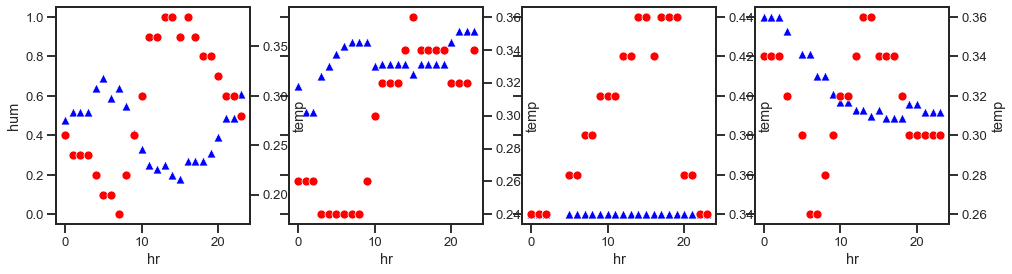

In [32]:
# parámetros de configuración de seaborn
sns.set(context='talk', style='ticks', font_scale=0.8, rc={'figure.figsize':(16,4)}) 

#Escogemos los días a analizar
day =pd.to_datetime(['2011/3/08','2011/3/09','2011/3/10','2011/3/11'])
# Creamos un gráfico múltiple
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
#Construimos los gráficos para los días cercanos al día que tiene valores de cero
for i, ax in enumerate(axes):
    ax1=sns.scatterplot(x="hr", y="hum", data=df_copy[(df_copy.dteday==day[i])],color='blue', marker='^', ax=ax)
    ax2 = ax1.twinx()
    ax2 = sns.scatterplot(x="hr", y="temp", data=df_copy[(df_copy.dteday==day[i])],color='red')
plt.show()

In [33]:
# Hacemos dos copias de la segunda matriz para incluir las columnas ya creadas, una para entrenamiento y otra para prueba
df_Train = df_copy.copy(deep=True)
df_Test  = df_copy.copy(deep=True)

# la matriz de entrenamiento serán todos los valores de humedad diferentes a NAN o 0. La # matriz de prueba lleva solo los 
# datos donde aparece NAN o 0.
options  = [np.nan, 0]
df_Train = df_Train.loc[df_Train.hum.isin(options)==False]
df_Test  = df_Test.loc[df_Test['hum'].isin(options)]

# Nos deshacemos de la columna humedad en esta matriz ya que será la que vamos a predecir.
df_Test.drop(columns = ['hum'], inplace=True)

In [34]:
# importamos el algoritmo de RandomForest el cual se ajusta a las características del fenómeno estudiado.
from sklearn.ensemble import RandomForestRegressor

In [35]:
# determinamos las variables con las cuales vamos a predecir los valores de humedad
predictors = ['hr','temp','month_int', 'weekday_int','fall', 'spring','summer', 'winter']
# llamamos el algoritmo de clasificación. 
rfr = RandomForestRegressor(n_estimators=100)
# realizamos el ajuste del algoritmo
rfr.fit(df_Train[predictors], df_Train['hum'])
# realizamos la predicción del se de datos que necesitamos. 
df_Test['hum'] = rfr.predict(X = df_Test[predictors])
# unificamos el resultado. 
df_copy2 = pd.concat([df_Train,df_Test],axis='rows', sort=False)
df_copy2.sort_index(inplace=True)

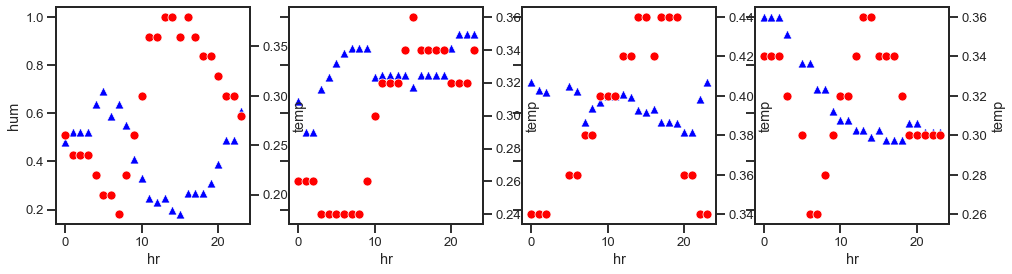

In [36]:
#Construimos los gráficos para los días cercanos al día que tenía los valores de cero
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
for i, ax in enumerate(axes):
    ax1=sns.scatterplot(x="hr", y="hum", data=df_copy2[(df_copy2.dteday==day[i])],color='blue', marker='^', ax=ax)
    ax2 = ax1.twinx()
    ax2 = sns.scatterplot(x="hr", y="temp", data=df_copy2[(df_copy2.dteday==day[i])],color='red')
plt.show()

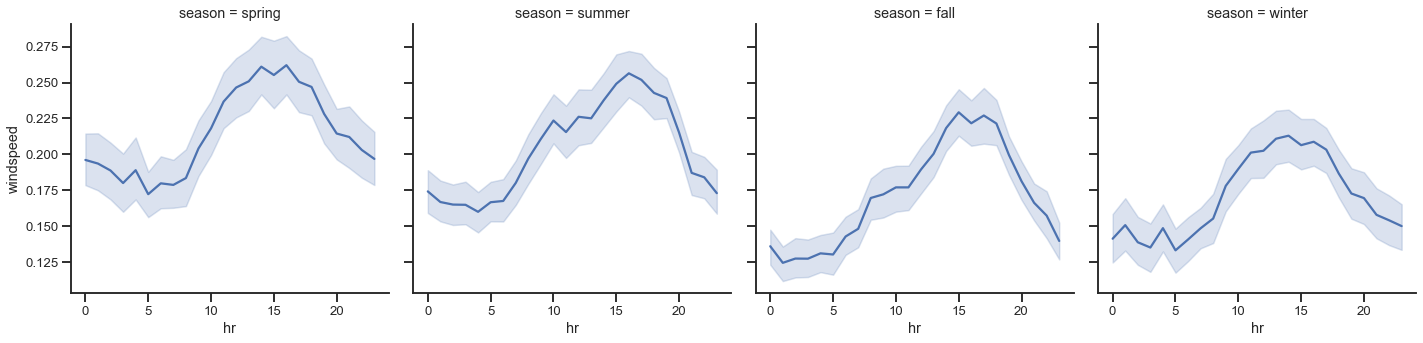

In [37]:
# Observamos el comportamiento de la velocidad del viento a través del día por estaciones 
sns.relplot(x="hr", y="windspeed", data=df_copy2, kind="line", col="season")

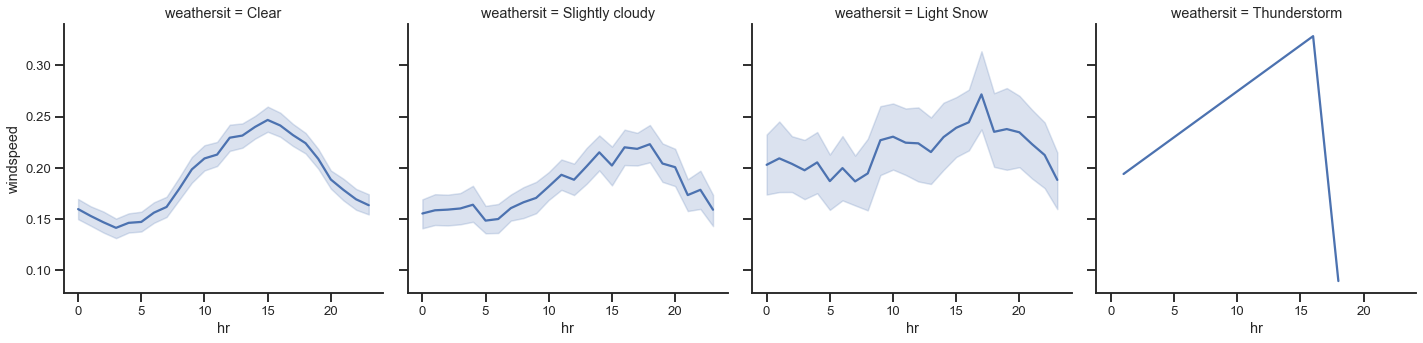

In [38]:
# Observamos el comportamiento de la velocidad del viento a través del día por estado del clima
sns.relplot(x="hr", y="windspeed", data=df_copy2, kind="line", col="weathersit")